In [32]:
# Introducción
# Este notebook contiene análisis de Clustering, Reglas de Asociación y Análisis de Componentes Principales
# sobre un dataset de películas. Se utilizarán diversas técnicas de preprocesamiento y análisis para extraer
# información relevante.

# Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.decomposition import PCA
from factor_analyzer import calculate_kmo, calculate_bartlett_sphericity
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import scale
import numpy as np
import vat
import random
import pyclustertend
import matplotlib.pyplot as plt
import sklearn.cluster as cluster
import sklearn.preprocessing
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import pairwise_distances


# Verificar que todo funciona bien
print("Librerías importadas correctamente")


Librerías importadas correctamente


In [2]:
# Cargar el dataset
file_path = "movies.csv"
df = pd.read_csv(file_path, delimiter=';', encoding='ISO-8859-1')

# Mostrar las primeras filas para exploración
df.head()


,id,budget,genres,homePage,productionCompany,productionCompanyCountry,productionCountry,revenue,runtime,video,...,popularity,releaseDate,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount
0,5,4000000,Crime|Comedy,https://www.miramax.com/movie/four-rooms/,Miramax|A Band Apart,US|US,United States of America,4257354.0,98,False,...,20.880,9/12/1995,5.7,2077.0,2.0,2.0,1.0,25.0,15,9
1,6,21000000,Action|Thriller|Crime,NaN,Universal Pictures|Largo Entertainment|JVC,US|US|JP,Japan|United States of America,12136938.0,110,False,...,9.596,15/10/1993,6.5,223.0,3.0,3.0,2.0,15.0,3,9
2,11,11000000,Adventure|Action|Science Fiction,http://www.starwars.com/films/star-wars-episod...,Lucasfilm|20th Century Fox,US|US,United States of America,775398007.0,121,NaN,...,100.003,25/05/1977,8.2,16598.0,3.0,2.0,1.0,105.0,5,62
3,12,94000000,Animation|Family,http://movies.disney.com/finding-nemo,Pixar,US,United States of America,940335536.0,100,NaN,...,134.435,30/05/2003,7.8,15928.0,2.0,1.0,1.0,24.0,5,18
4,13,55000000,Comedy|Drama|Romance,NaN,Paramount|The Steve Tisch Company,US|,United States of America,677387716.0,142,False,...,58.751,6/07/1994,8.5,22045.0,3.0,2.0,1.0,76.0,18,48


In [3]:
df.describe()


,id,budget,revenue,runtime,popularity,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount
count,10000.000000,1.000000e+04,1.000000e+04,10000.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000
mean,249876.829300,1.855163e+07,5.673753e+07,100.268100,51.407835,6.483243,1342.888055,2.595538,3.170768,1.750100,2148.520208
std,257380.109004,3.662669e+07,1.495826e+08,27.777829,216.771736,0.984324,2564.584239,1.153534,2.539207,3.010566,37207.494312
min,5.000000,0.000000e+00,0.000000e+00,0.000000,4.258000,1.300000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,12286.500000,0.000000e+00,0.000000e+00,90.000000,14.580500,5.900000,120.000000,2.000000,2.000000,1.000000,13.000000
50%,152558.000000,5.000000e+05,1.631245e+05,100.000000,21.912000,6.500000,415.000000,3.000000,3.000000,1.000000,21.000000
75%,452021.750000,2.000000e+07,4.479661e+07,113.000000,40.660750,7.200000,1316.000000,3.000000,4.000000,2.000000,36.000000
max,922260.000000,3.800000e+08,2.847246e+09,750.000000,11474.647000,10.000000,30788.000000,16.000000,89.000000,155.000000,919590.000000


In [4]:
# Mostrar primeras filas para exploración inicial
df.head()


,id,budget,genres,homePage,productionCompany,productionCompanyCountry,productionCountry,revenue,runtime,video,...,popularity,releaseDate,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount
0,5,4000000,Crime|Comedy,https://www.miramax.com/movie/four-rooms/,Miramax|A Band Apart,US|US,United States of America,4257354.0,98,False,...,20.880,9/12/1995,5.7,2077.0,2.0,2.0,1.0,25.0,15,9
1,6,21000000,Action|Thriller|Crime,NaN,Universal Pictures|Largo Entertainment|JVC,US|US|JP,Japan|United States of America,12136938.0,110,False,...,9.596,15/10/1993,6.5,223.0,3.0,3.0,2.0,15.0,3,9
2,11,11000000,Adventure|Action|Science Fiction,http://www.starwars.com/films/star-wars-episod...,Lucasfilm|20th Century Fox,US|US,United States of America,775398007.0,121,NaN,...,100.003,25/05/1977,8.2,16598.0,3.0,2.0,1.0,105.0,5,62
3,12,94000000,Animation|Family,http://movies.disney.com/finding-nemo,Pixar,US,United States of America,940335536.0,100,NaN,...,134.435,30/05/2003,7.8,15928.0,2.0,1.0,1.0,24.0,5,18
4,13,55000000,Comedy|Drama|Romance,NaN,Paramount|The Steve Tisch Company,US|,United States of America,677387716.0,142,False,...,58.751,6/07/1994,8.5,22045.0,3.0,2.0,1.0,76.0,18,48


CLUSTERING

1.1. Haga el preprocesamiento del dataset, explique qué variables no aportan información a la generación de grupos y por qué. Describa con qué variables calculará los grupos.

In [5]:
# Selección de variables para clustering
columns_to_use = ['budget', 'revenue', 'popularity', 'voteAvg', 'voteCount',
                  'genresAmount', 'productionCoAmount', 'productionCountriesAmount',
                  'actorsAmount', 'castWomenAmount', 'castMenAmount']

# Filtrar solo las columnas que realmente están en el dataset
columns_to_use = [col for col in columns_to_use if col in df.columns]

# Reemplazar valores no numéricos o nulos en todas las columnas seleccionadas por 0
df[columns_to_use] = df[columns_to_use].apply(pd.to_numeric, errors='coerce').fillna(0)

# Eliminar filas con valores nulos solo en las columnas seleccionadas
data = df[columns_to_use]

# Variables que no se utilizarán y su justificación
unused_columns = ['id', 'genres','runtime', 'homePage', 'video', 'director', 'actors', 'originalTitle',
                  'title', 'originalLanguage', 'releaseDate', 'actorsPopularity']
df = df.drop(columns=unused_columns)

# Escalar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Mostrar las primeras filas después de la transformación
df_scaled = pd.DataFrame(data_scaled, columns=columns_to_use)
df_scaled.head()


,budget,revenue,popularity,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount
0,-0.397316,-0.350862,-0.140768,-0.786486,0.286515,-0.514980,-0.460548,-0.248969,-0.057064,-0.103754,-0.163043
1,0.066850,-0.298182,-0.192835,0.019495,-0.436550,0.351261,-0.066749,0.083255,-0.057332,-0.103933,-0.163043
2,-0.206189,4.804679,0.224325,1.732203,5.949747,0.351261,-0.460548,-0.248969,-0.054913,-0.103903,-0.162511
3,2.060032,5.907385,0.383203,1.329213,5.688445,-0.514980,-0.854348,-0.248969,-0.057090,-0.103903,-0.162953
4,0.995181,4.149421,0.033978,2.034446,8.074093,0.351261,-0.460548,-0.248969,-0.055692,-0.103709,-0.162651



1.2. Analice la tendencia al agrupamiento usando el estadístico de Hopkings y la VAT (Visual Assessment of cluster Tendency). Esta última hágala si es posible, teniendo en cuenta las dimensiones del conjunto de datos. Discuta sus resultados e impresiones.


Estadística de Hopkins: 0.0110


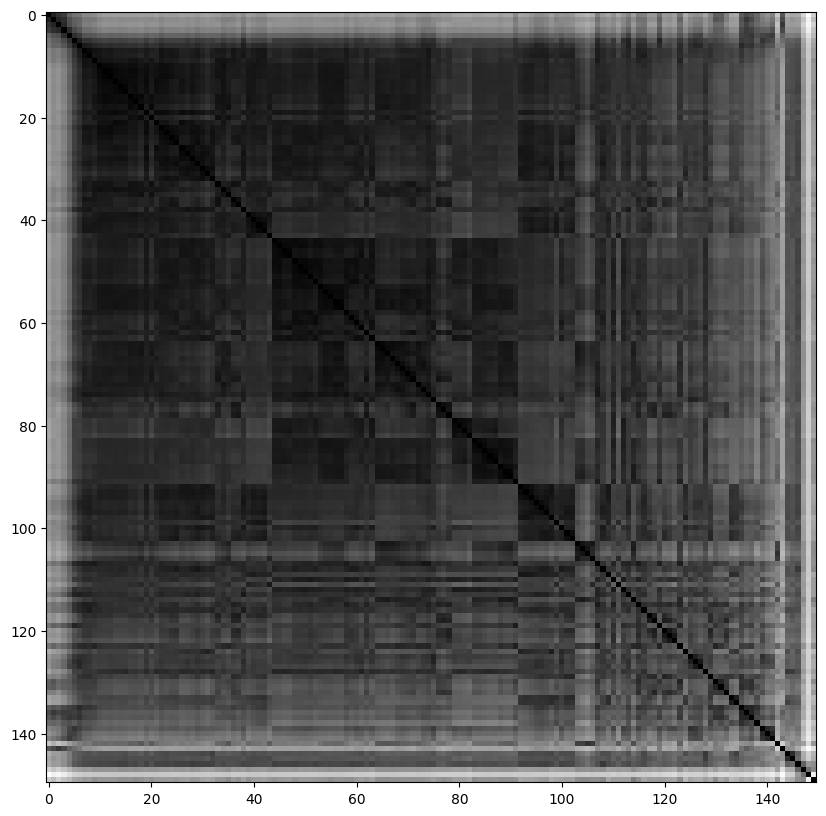

In [16]:
# Fijar la semilla para obtener resultados reproducibles
random.seed(123)

# Escalar los datos para normalización
X_scale = sklearn.preprocessing.scale(data_scaled)

# Calcular la estadística de Hopkins
hopkins_stat = pyclustertend.hopkins(X_scale, len(X_scale))
print(f'Estadística de Hopkins: {hopkins_stat:.4f}')

# Aplicar VAT con una muestra de datos si el tamaño es grande
X_scale = StandardScaler().fit_transform(data)
if X_scale.shape[0] > 150:
    X_sampled = X_scale[random.sample(range(X_scale.shape[0]), 150), :]
else:
    X_sampled = X_scale
pyclustertend.vat(X_sampled)

Dado que el estadístico de Hopkins indica que los datos no son aleatorios ya que no son 0.5 o cercanos a este numero y el gráfico VAT muestra bloques oscuros, hay una base sólida para proceder con el análisis de agrupamiento.


1.3. Determine cuál es el número de grupos a formar más adecuado para los datos que está trabajando. Haga una gráfica de codo y explique la razón de la elección de la cantidad de clústeres con la que trabajará.


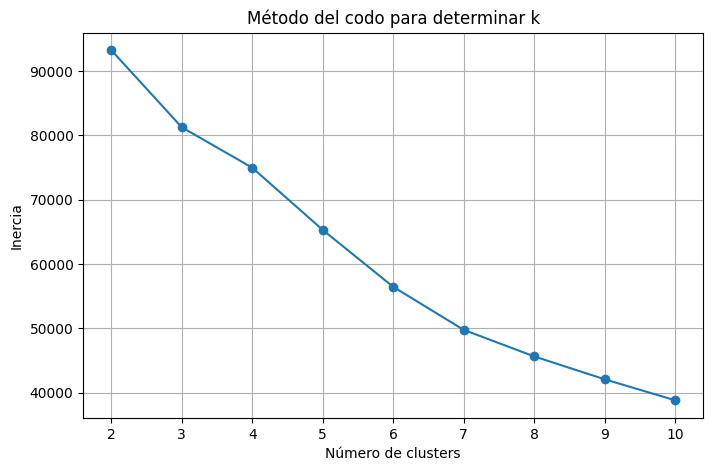

In [24]:
# Determinar el número óptimo de clusters con la gráfica del codo
inertia = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del codo para determinar k')
plt.grid(True)
plt.show()


En este caso vamos a elegir 4 clusters ya que aunque la gráfica del codo no muestra un punto de inflexión claro, alrededor de k=4 la reducción de la inercia comienza a ser menos pronunciada, lo que indica que agregar más clusters no aporta una mejora significativa en la compactación de los grupos.


1.4. Utilice los algoritmos k-medias y clustering jerárquico para agrupar. Compare los resultados generados por cada uno.


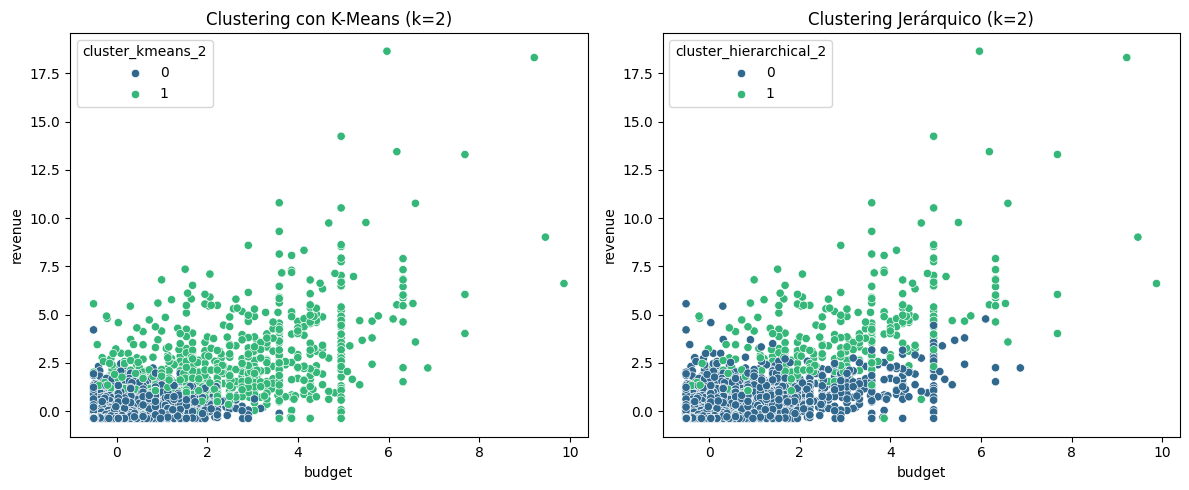

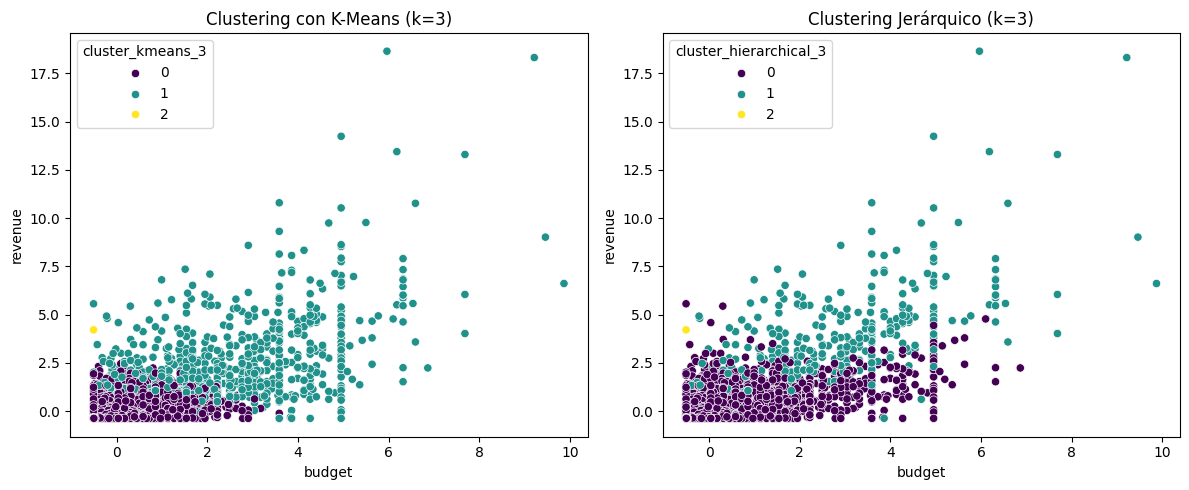

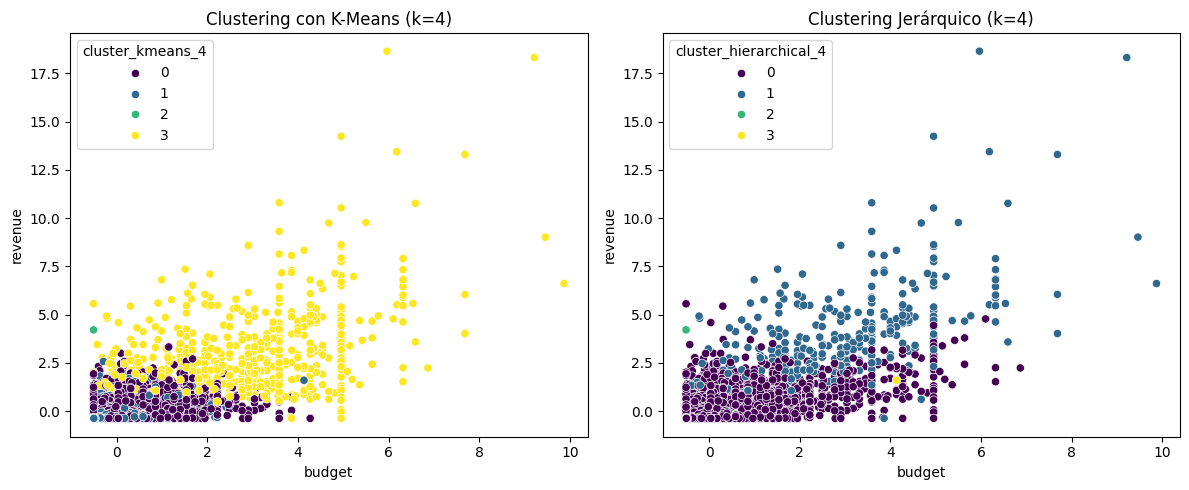

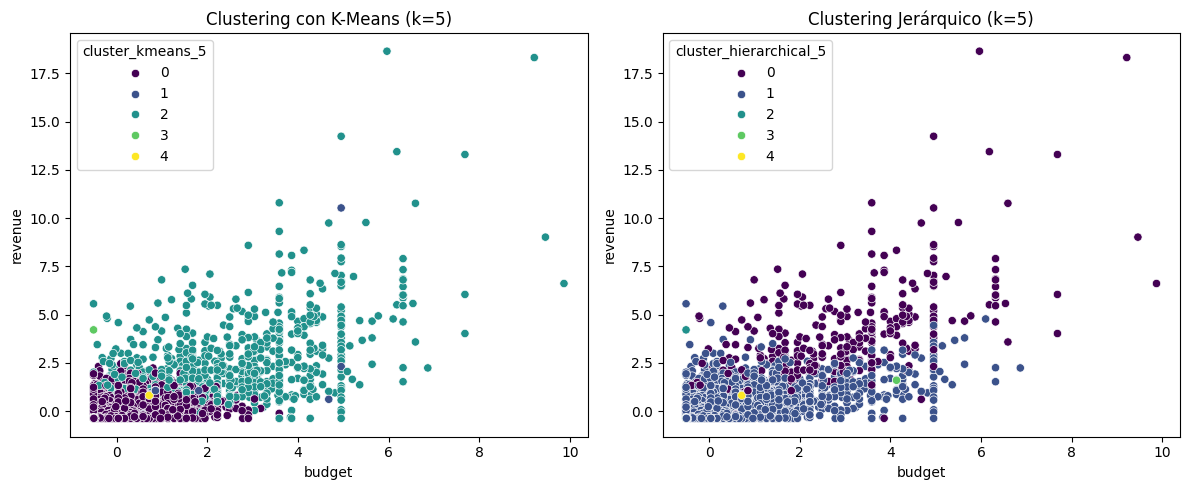

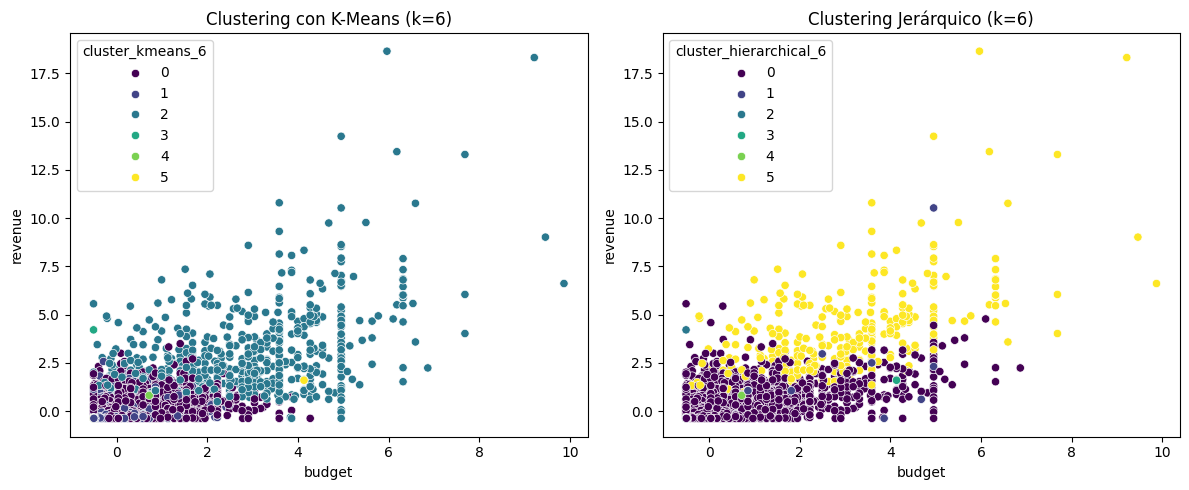

In [26]:
# Definir el rango de clusters a evaluar
k_values = range(2, 7)

# Crear figuras para comparar K-Means y Clustering Jerárquico para cada k
for k in k_values:
    # Aplicación de K-Means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    df[f'cluster_kmeans_{k}'] = kmeans.fit_predict(data_scaled)

    # Aplicación de Clustering Jerárquico
    hierarchical = AgglomerativeClustering(n_clusters=k)
    df[f'cluster_hierarchical_{k}'] = hierarchical.fit_predict(data_scaled)

    # Visualización
    plt.figure(figsize=(12, 5))

    # Visualización K-Means
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=df[f'cluster_kmeans_{k}'], palette="viridis")
    plt.title(f"Clustering con K-Means (k={k})")
    plt.xlabel(columns_to_use[0])
    plt.ylabel(columns_to_use[1])

    # Visualización Clustering Jerárquico
    plt.subplot(1, 2, 2)
    sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=df[f'cluster_hierarchical_{k}'], palette="viridis")
    plt.title(f"Clustering Jerárquico (k={k})")
    plt.xlabel(columns_to_use[0])
    plt.ylabel(columns_to_use[1])

    plt.tight_layout()
    plt.show()


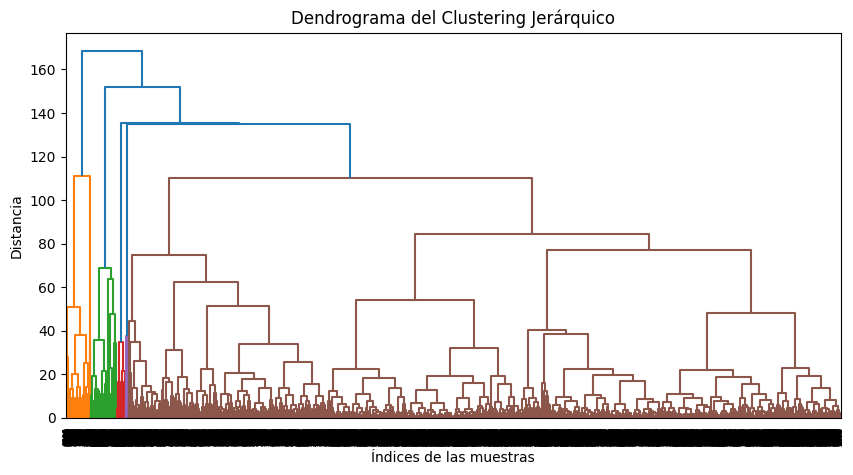

,cluster_kmeans,cluster_hierarchical
0,1,0
1,0,0
2,3,1
3,3,1
4,3,1


In [36]:
# Aplicación de K-Means con el número óptimo de clusters (suponiendo k=4 basado en el codo)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['cluster_kmeans'] = kmeans.fit_predict(data_scaled)

# Aplicación de clustering jerárquico
hierarchical = AgglomerativeClustering(n_clusters=4)
df['cluster_hierarchical'] = hierarchical.fit_predict(data_scaled)

# Visualización del dendrograma
plt.figure(figsize=(10, 5))
linkage_matrix = linkage(data_scaled, method='ward')
dendrogram(linkage_matrix)
plt.title('Dendrograma del Clustering Jerárquico')
plt.xlabel('Índices de las muestras')
plt.ylabel('Distancia')
plt.show()  # Mostrar directamente en el notebook

# Mostrar las primeras filas con las asignaciones de clusters
df[['cluster_kmeans', 'cluster_hierarchical']].head()



1.5. Determine la calidad del agrupamiento hecho por cada algoritmo con el método de la silueta. 
Discuta los resultados.


Para n_clusters = 2, el coeficiente de silueta promedio es: 0.5086
Para n_clusters = 3, el coeficiente de silueta promedio es: 0.5306
Para n_clusters = 4, el coeficiente de silueta promedio es: 0.1755
Para n_clusters = 5, el coeficiente de silueta promedio es: 0.5260
Para n_clusters = 6, el coeficiente de silueta promedio es: 0.1951


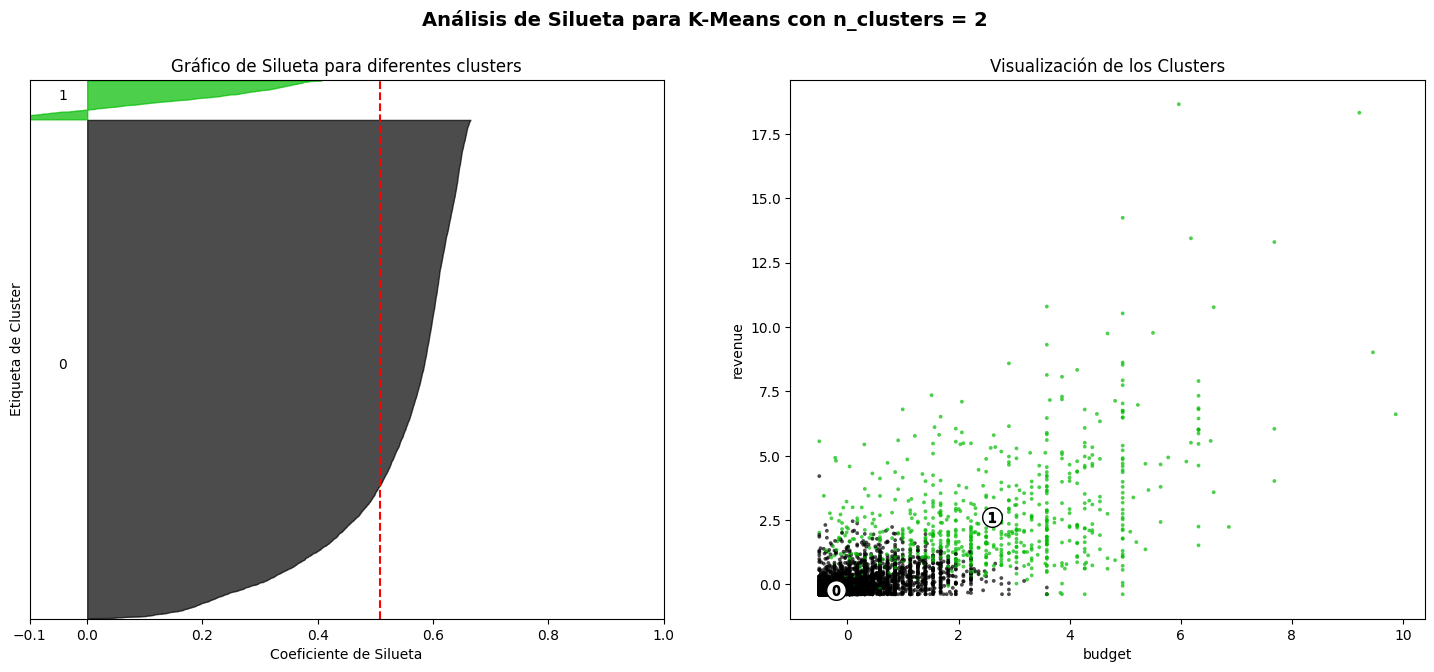

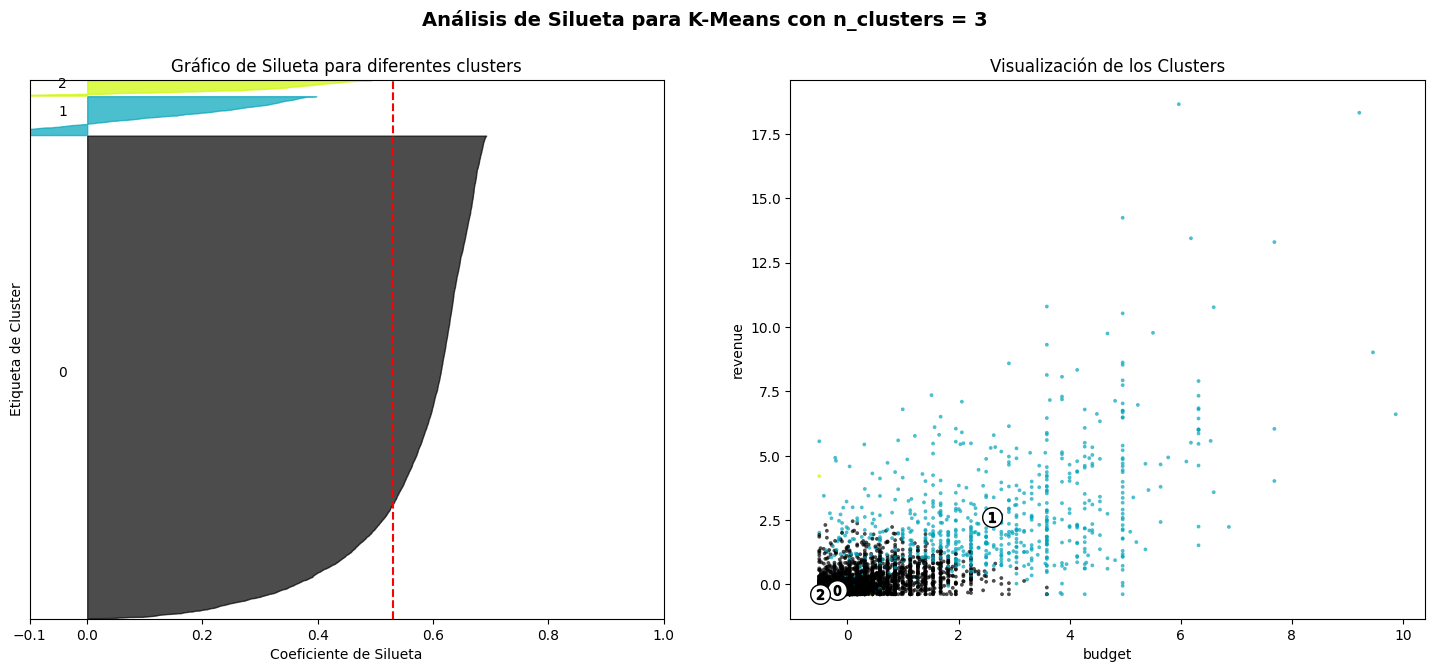

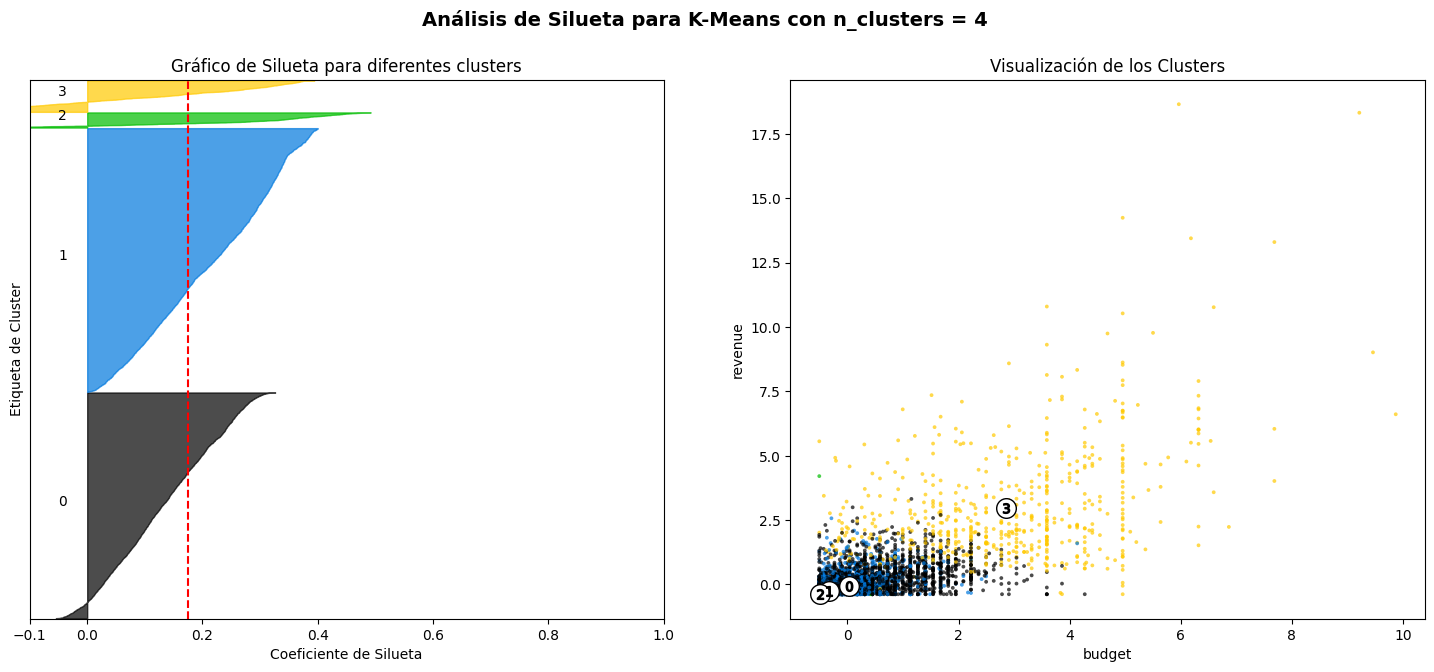

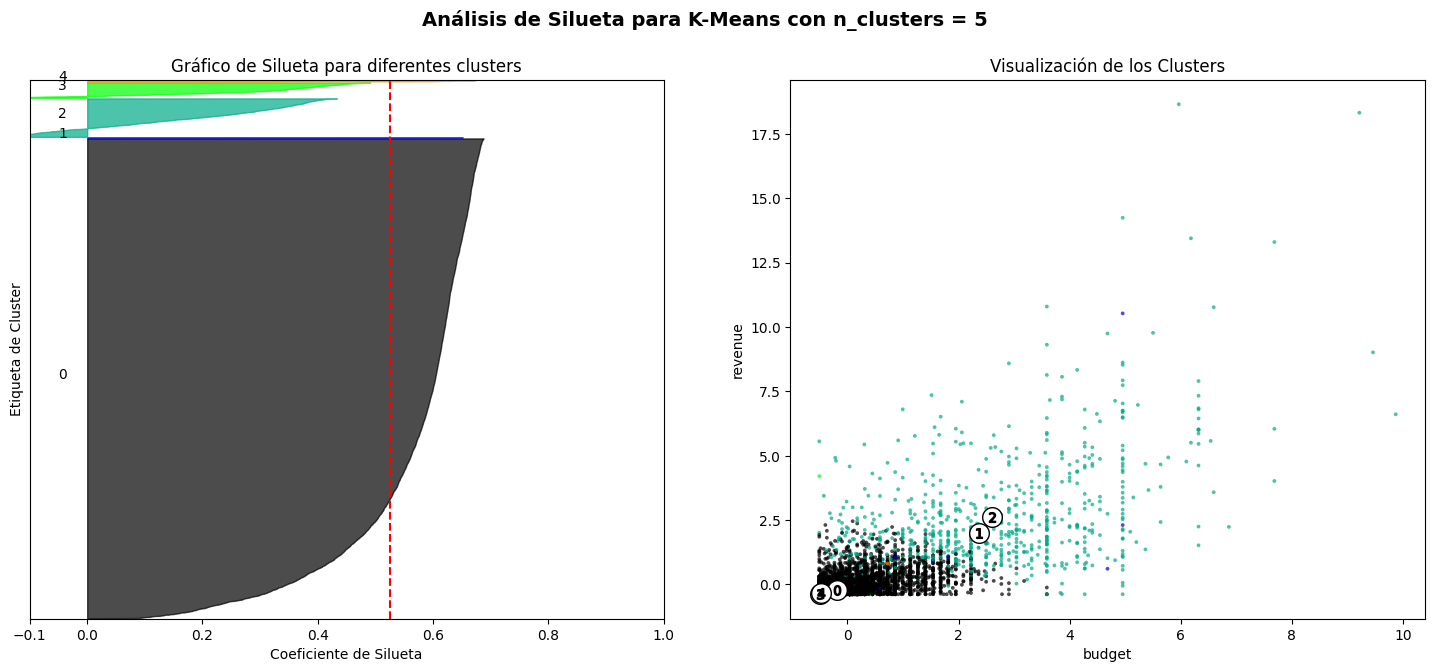

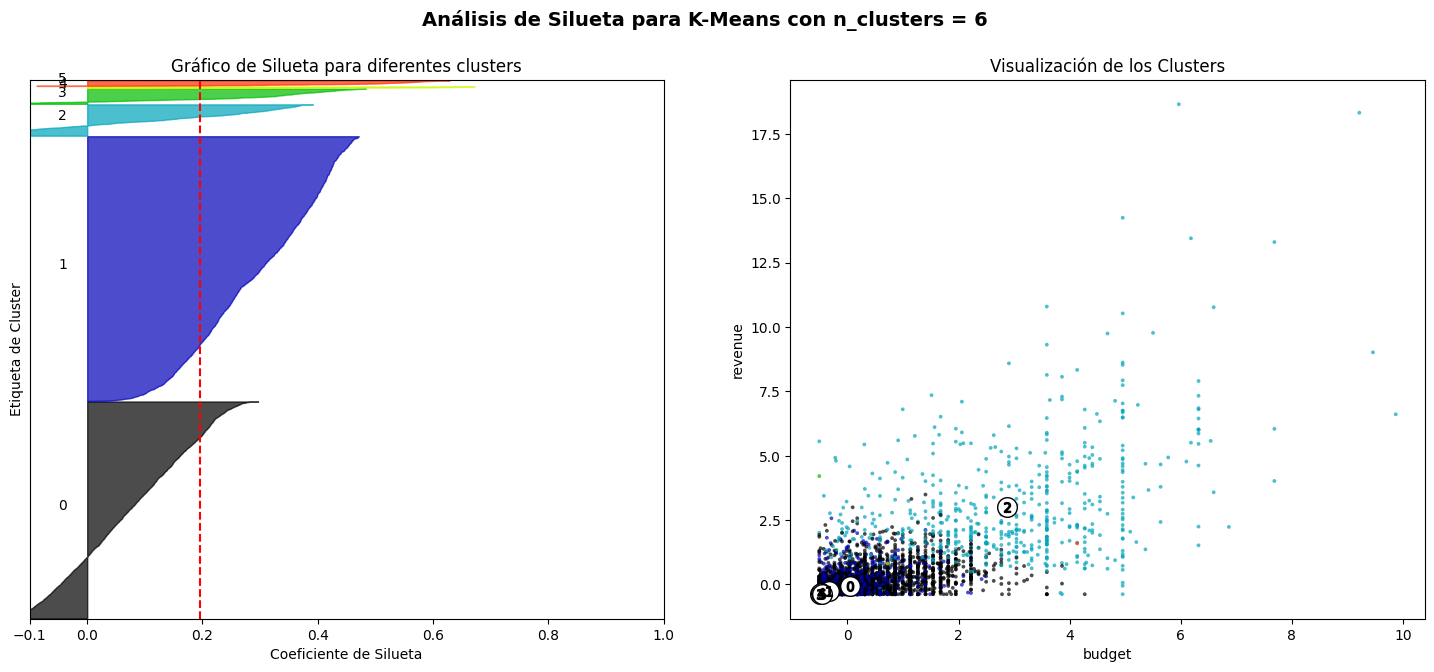

In [34]:
# Rango de clusters a evaluar
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Crear una figura con dos subgráficos
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # Configuración del gráfico de silueta
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(data_scaled) + (n_clusters + 1) * 10])

    # Aplicar K-Means
    clusterer = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = clusterer.fit_predict(data_scaled)

    # Calcular el coeficiente de silueta promedio
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    print(f"Para n_clusters = {n_clusters}, el coeficiente de silueta promedio es: {silhouette_avg:.4f}")

    # Calcular los valores de silueta para cada muestra
    sample_silhouette_values = silhouette_samples(data_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Obtener los valores de silueta del cluster actual y ordenarlos
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Etiquetar los clusters en el gráfico
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # Espaciado entre clusters

    ax1.set_title("Gráfico de Silueta para diferentes clusters")
    ax1.set_xlabel("Coeficiente de Silueta")
    ax1.set_ylabel("Etiqueta de Cluster")

    # Línea roja para el coeficiente de silueta promedio
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # Gráfico de dispersión de los clusters
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(data_scaled[:, 0], data_scaled[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")

    # Centros de los clusters
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker="o", c="white", alpha=1, s=200, edgecolor="k")

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker=f"${i}$", alpha=1, s=50, edgecolor="k")

    ax2.set_title("Visualización de los Clusters")
    ax2.set_xlabel(columns_to_use[0])
    ax2.set_ylabel(columns_to_use[1])

    plt.suptitle(f"Análisis de Silueta para K-Means con n_clusters = {n_clusters}",
                 fontsize=14, fontweight="bold")

plt.show()

El mejor coeficiente de silueta se obtuvo con 3 clusters (0.5306) y 5 clusters (0.5260), lo que indica que estos valores de k generan mejores agrupamientos. En cambio, 4 clusters (0.1755) tiene una baja calidad, sugiriendo que no es una buena opción. Basado en estos resultados, 3 o 5 clusters serían más adecuados para el análisis.


1.6. Interprete los grupos basado en el conocimiento que tiene de los datos. Recuerde investigar las 
medidas de tendencia central de las variables continuas y las tablas de frecuencia de las 
variables categóricas pertenecientes a cada grupo. Identifique hallazgos interesantes debido a 
las agrupaciones y describa para qué le podría servir. 


budget                                  revenue  \
                        mean       median           std          mean   
cluster_kmeans                                                          
0               1.923031e+07    6000000.0  2.651769e+07  4.541255e+07   
1               6.507577e+06          0.0  1.326760e+07  1.609922e+07   
2               2.718918e+05          0.0  2.208116e+06  2.568290e+06   
3               1.230700e+08  125000000.0  6.312937e+07  5.030814e+08   

                                           popularity                      \
                     median           std        mean  median         std   
cluster_kmeans                                                              
0                 9000000.0  7.089472e+07   44.997438  22.989   90.333768   
1                       0.0  3.988936e+07   36.378654  18.967   81.235084   
2                       0.0  4.080457e+07   47.118057  22.925   74.557113   
3               403170142.0  3.386815e+08  224.443966  87.786  806.426636   

                 voteAvg  ... cluster_kmeans_5 cluster_hierarchical_5         \
                    mean  ...              std                   mean median   
cluster_kmeans            ...                                                  
0               6.775766  ...         0.391913               1.014493    1.0   
1               6.179122  ...         0.292406               1.066477    1.0   
2               6.273852  ...         0.000000               2.000000    2.0   
3               6.989304  ...         0.115848               0.461800    0.0   

                         cluster_kmeans_6                   \
                     std             mean median       std   
cluster_kmeans                                               
0               0.177190         0.055358    0.0  0.350211   
1               0.369997         1.090872    1.0  0.588002   
2               0.000000         3.000000    3.0  0.000000   
3               0.498962         1.986418    2.0  0.164396   

               cluster_hierarchical_6                   
                                 mean median       std  
cluster_kmeans                                          
0                            0.024471    0.0  0.273375  
1                            0.102460    0.0  0.547530  
2                            2.000000    2.0  0.000000  
3                            2.616299    5.0  2.484402  

[4 rows x 69 columns]

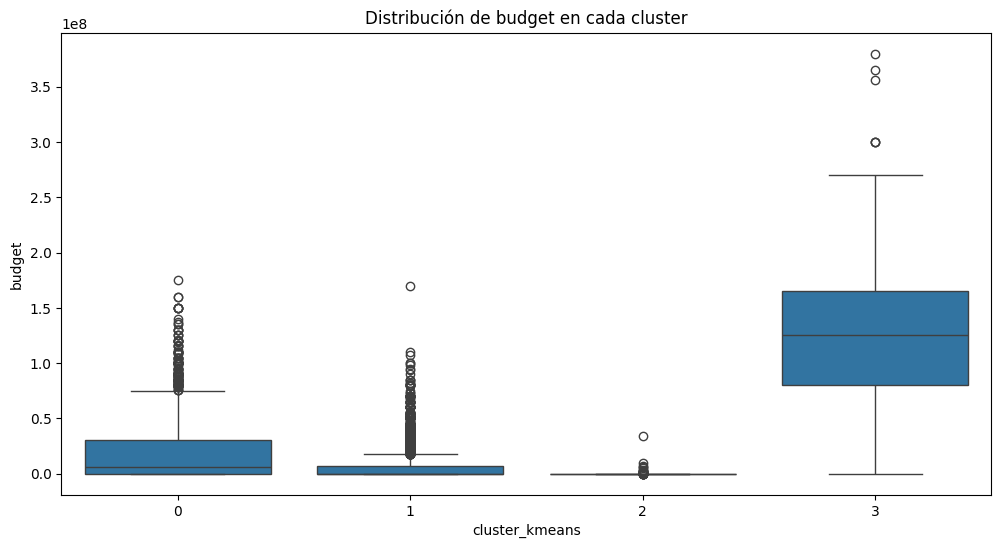

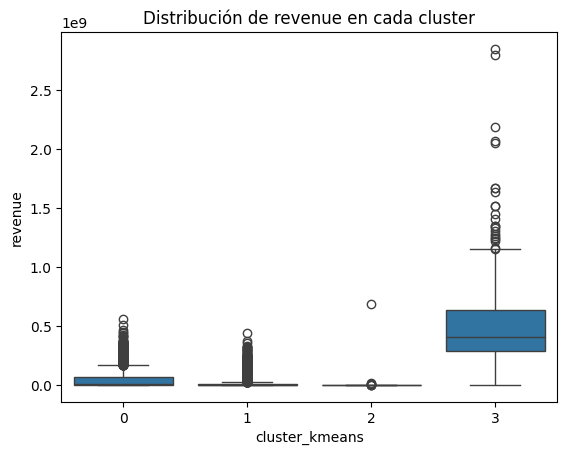

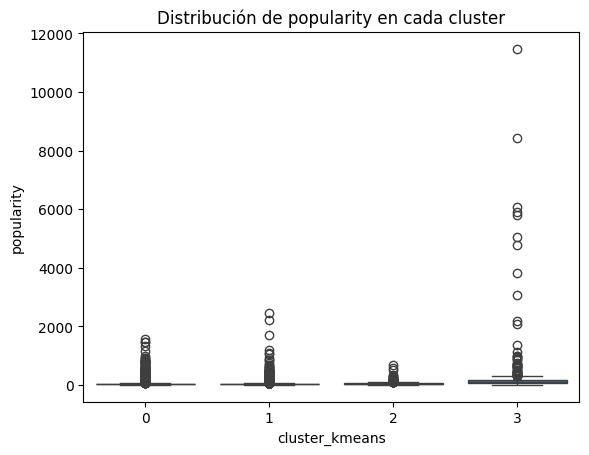

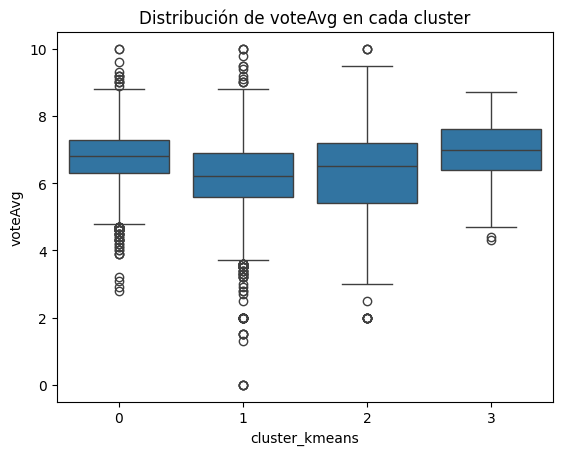

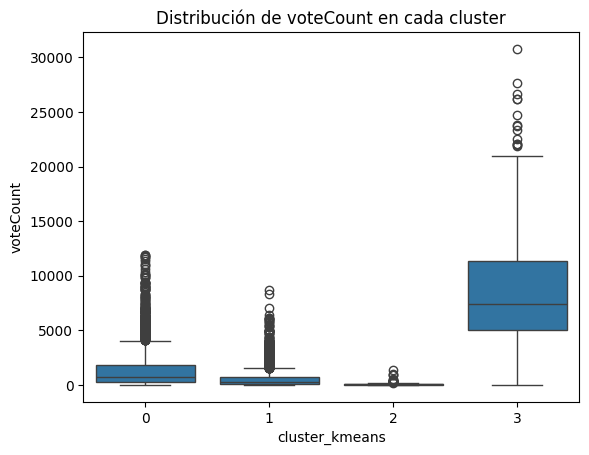

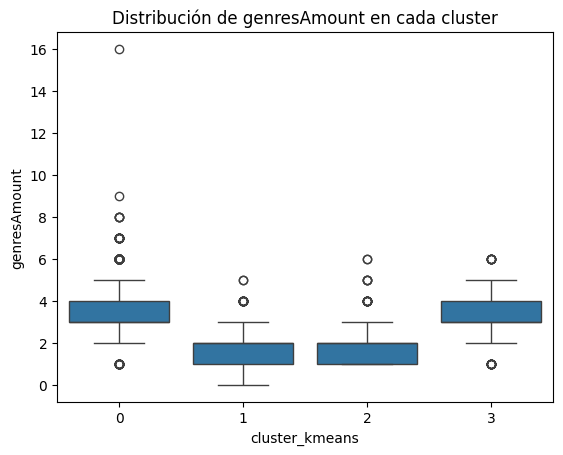

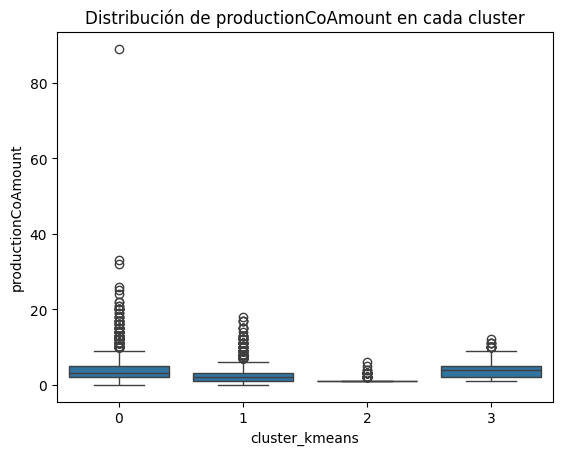

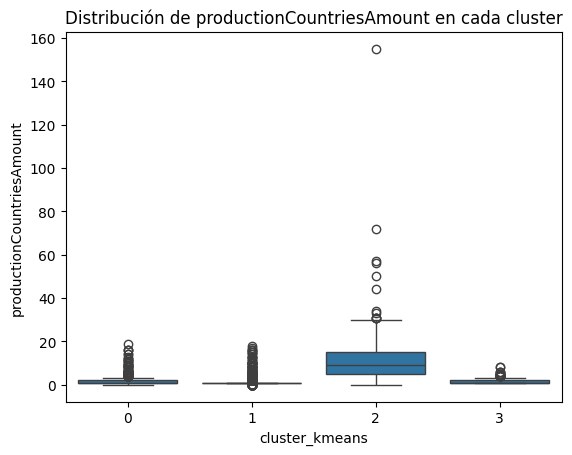

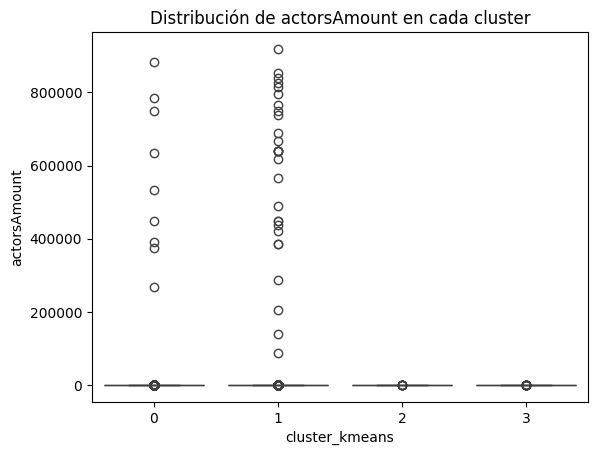

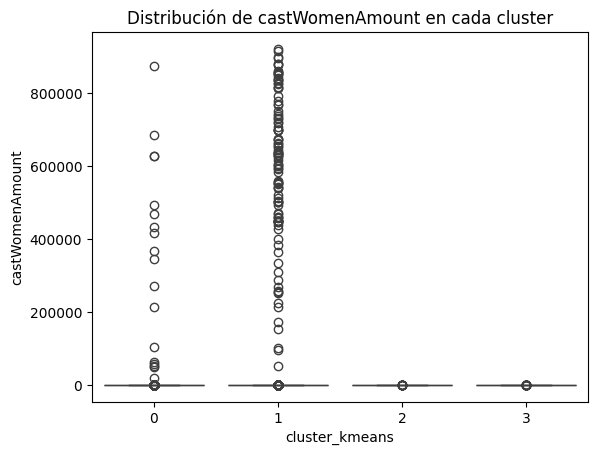

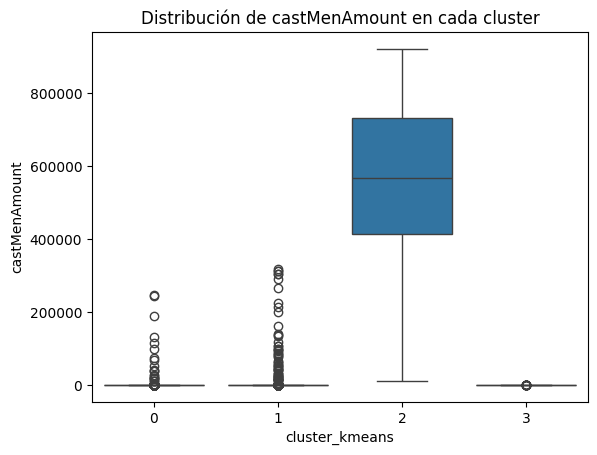

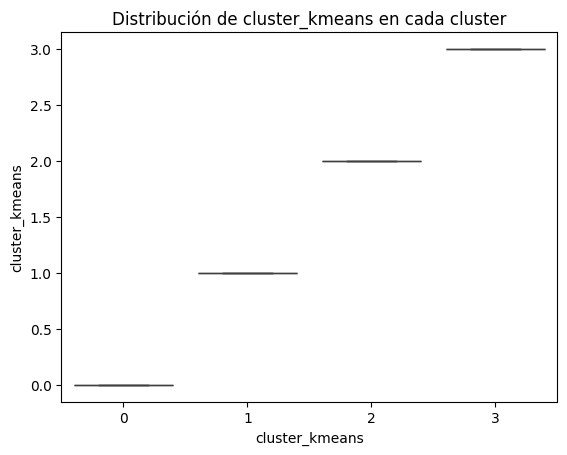

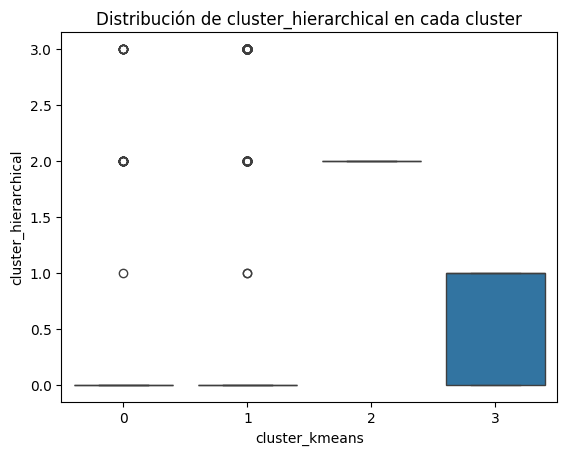

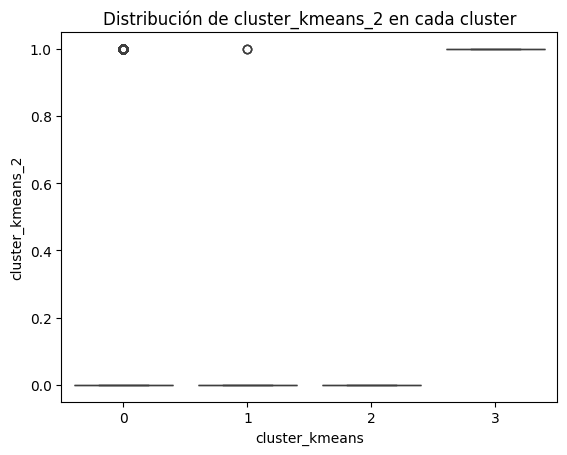

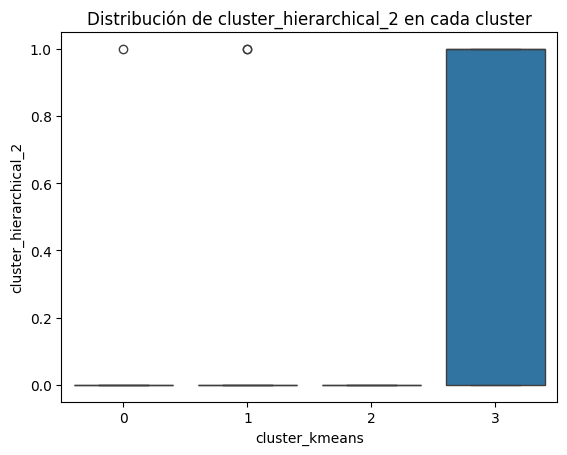

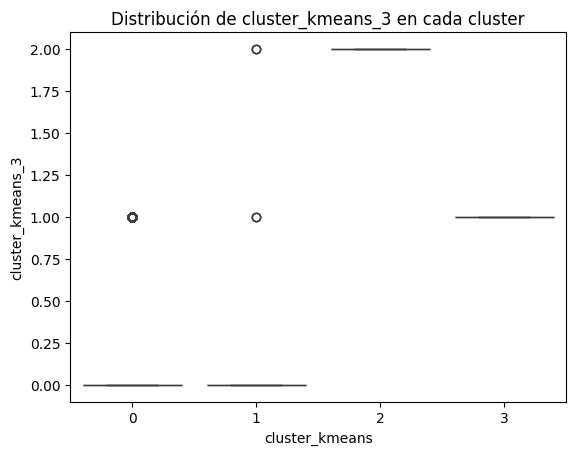

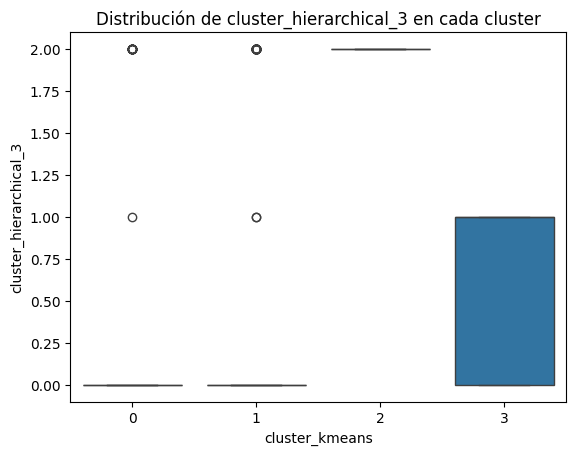

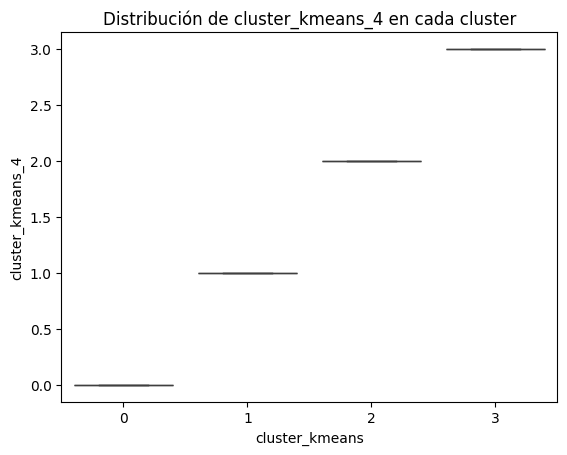

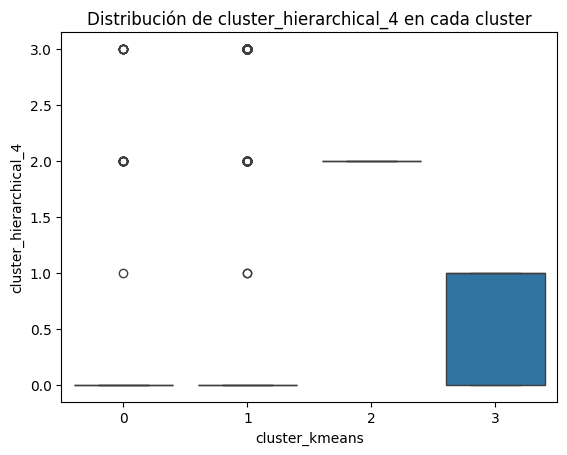

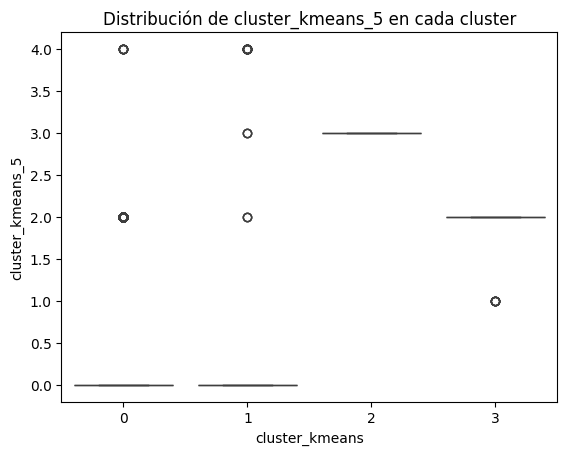

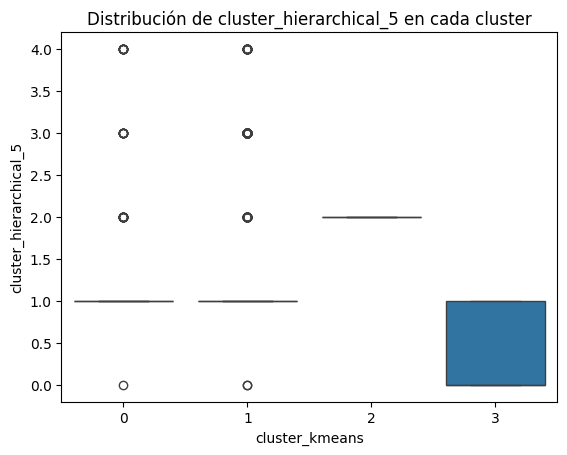

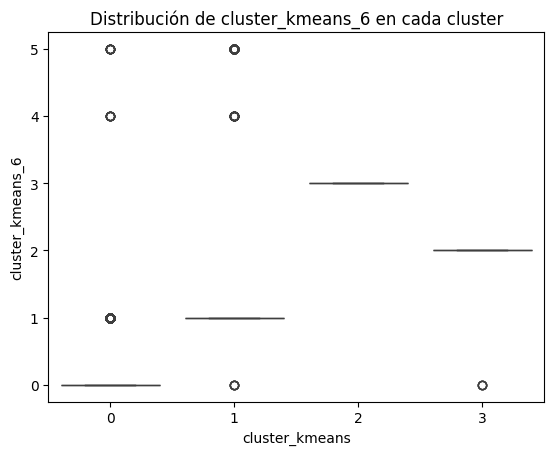

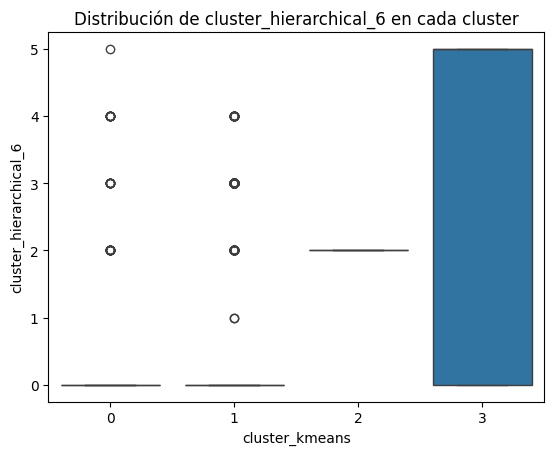


Distribución de productionCompany por cluster:


cluster_kmeans  productionCompany                                                                                                   
0               Warner Bros. Animation                                                                                                  0.006244
                Paramount                                                                                                               0.005764
                Toei Animation                                                                                                          0.004563
                Universal Pictures                                                                                                      0.004563
                Columbia Pictures                                                                                                       0.004083
                                                                                                                                          ... 


Distribución de productionCompanyCountry por cluster:


cluster_kmeans  productionCompanyCountry
0               US|US                       0.086000
                US                          0.078000
                US|US|US                    0.057500
                JP                          0.031750
                |US                         0.027000
                                              ...   
3               ||US|                       0.001701
                ||US|US|US                  0.001701
                |||US                       0.001701
                ||||                        0.001701
                ||||US|US|US                0.001701
Name: proportion, Length: 2770, dtype: float64


Distribución de productionCountry por cluster:


cluster_kmeans  productionCountry                              
0               United States of America                           0.466380
                Japan                                              0.093563
                United Kingdom|United States of America            0.039244
                United Kingdom                                     0.023451
                Canada|United States of America                    0.022733
                                                                     ...   
3               United States of America|Canada                    0.001698
                United States of America|Germany|Czech Republic    0.001698
                United States of America|India                     0.001698
                United States of America|Malta|United Kingdom      0.001698
                United States of America|Norway|Sweden             0.001698
Name: proportion, Length: 1117, dtype: float64


Distribución de actorsCharacter por cluster:


cluster_kmeans  actorsCharacter                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [38]:
# Filtrar solo las columnas numéricas para el análisis por cluster
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# Resumen estadístico de las variables numéricas por cluster (usando K-Means)
cluster_summary = df.groupby('cluster_kmeans')[numeric_columns].agg(['mean', 'median', 'std'])
display(cluster_summary)

# Ver distribución de los clusters en cada variable numérica
plt.figure(figsize=(12, 6))
for col in numeric_columns:
    sns.boxplot(x=df['cluster_kmeans'], y=df[col])
    plt.title(f"Distribución de {col} en cada cluster")
    plt.show()

# Análisis de frecuencia para variables categóricas (si las hubiera)
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

for col in categorical_columns:
    print(f"\nDistribución de {col} por cluster:")
    display(df.groupby('cluster_kmeans')[col].value_counts(normalize=True))
